In [4]:
import sys
sys.path.append('../')

from collections import Counter
from math import log
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import plotly.express as px


from evolution import Evolver

def shannon(string):
    counts = Counter(string)
    str_len = len(string)
    frequencies = ((i / str_len) for i in counts.values())
    return(-sum(f * log(f, 2) for f in frequencies))

#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))


In [64]:
evolver =  Evolver("flatrates")
x = []
for _ in range(10000):
    x.append(shannon(evolver.randomseq(25)))


In [65]:
evolver =  Evolver("codonrates")
y = []
for _ in range(10000):
    y.append(shannon(evolver.randomseq(24)))


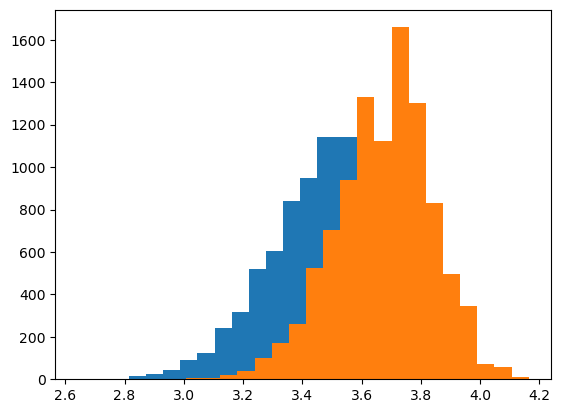

In [66]:
hist = plt.hist(y, bins=25)
hist = plt.hist(x, bins=25)

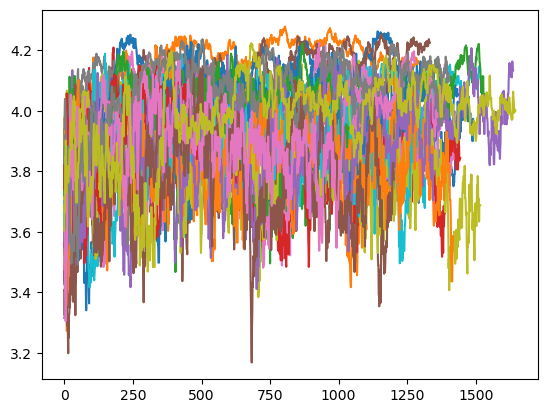

In [67]:
for i in range(1,30):
    lineage = pd.read_csv(f'../../SCER/run{i}/visual_pfes_results/lineage.tsv', sep='\t', comment='#')
    y = []
    for seq in lineage.sequence:
        y.append(shannon(seq))
    plt.plot(y)

In [68]:
lineage = pd.read_csv(f'../../SCER/run26/visual_pfes_results/lineage.tsv', sep='\t', comment='#')
bestlog = pd.read_csv(f'../../SCER/run26/visual_pfes_results/bestlog.tsv', sep='\t', comment='#')
progresslog = pd.read_csv(f'../../SCER/run26/progress.log', sep='\t', comment='#')



In [79]:
seq3di = pd.read_csv(f'../../SCER/run26/visual_pfes_results/seqs.3difa', sep='\t', comment='#', names=['gndx','fs3di'])
seq3di['gndx'] = seq3di['gndx'].str.replace(".pdb", '', regex=False)

In [82]:
df = pd.merge(lineage, seq3di, on='gndx', how="inner").dropna()

df['cd'] = df.num_conts / df.seq_len
entroaa = [(shannon(seq)) for seq in df.sequence]
entro3di = [(shannon(seq)) for seq in df.fs3di] 


df['entroaa'] = entroaa
df['entro3di'] = entro3di

#https://github.com/nmatzke/3diphy/blob/main/examples/pdb_to_3di/_README_str_to_3di_v2_WORKS.txt
#foldseek structureto3didescriptor trajpdb/*pdb 3di.dat
#awk -F"\t" '{print >$1"n"$3}' 3di.dat > seqs.3difa
#

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202],
           dtype='int64', length=1203)

In [86]:
fig = px.scatter_3d(df, x='entroaa', y='entro3di', z='score',
              color=df.index, width=600, height=600)
fig.update_traces(marker_size = 3)
#fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=True )
fig.show()



In [ ]:
# Create your 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z, = df.mean_plddt, df.ptm, df.score
scatter = ax.scatter(x, y, z, linewidths=0.01, marker='.')

In [ ]:
# Animate it
# This function shows the 3d plot from ith angle
def animate(i):
    print(i, end="\n")
    ax.view_init(elev=10., azim=i)
    return fig,

anim = animation.FuncAnimation(fig, animate, frames=360, interval=2, blit=True) # I don't remember what interval=10 and blit=True do
anim.save('your_file_name.gif', dpi=150, writer='imagemagick')
